<a href="https://colab.research.google.com/github/sagsarkar/ML_Coding/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X, y =  datasets.make_blobs(n_samples=50, n_features=3, centers=3, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [3]:
class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, max_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.max_iters = max_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n, d = X.shape
    self.w = np.zeros(d)
    self.b = 0.
    for _ in range(self.max_iters):
      for idx, x_i in enumerate(X):
        y_i = y[idx]
        condition = y_i * (np.dot(self.w, x_i) + self.b) >= 1
        if condition:
          dw = 2 * self.lambda_param * self.w
          db = 0
        else:
          dw = (2 * self.lambda_param * self.w) - (y_i * x_i)
          db = -y_i

        self.w -= dw * self.lr
        self.b -= db * self.lr

  def predict(self, X):
    y_pred = np.dot(X, self.w) + self.b
    return np.sign(y_pred)

In [4]:
clf = SVM()
clf.fit(X, y)
predictions = clf.predict(X)

print(clf.w, clf.b)

[-0.20334488  0.34762713 -0.05190083] 1.0459999999999956


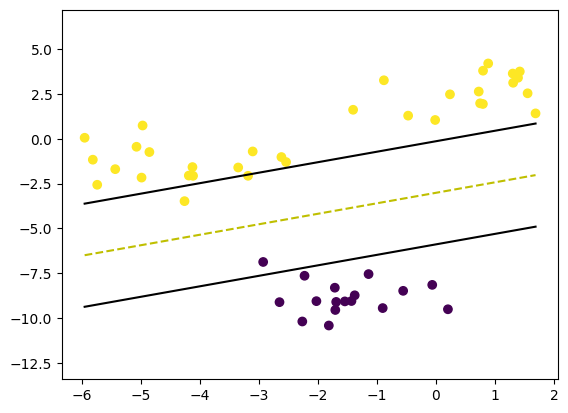

In [5]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()